# Домашняя работа №5. Логистическая регрессия

Цель работы: Обучить модель логистической регрессии с настройкой гиперпараметров.

### Работа с набором данных для задачи классификации (целевая переменная - класс объекта)

## Задание №1

Цель: Получить чистые данные

#### Предварительная подготовка данных
* Заполнить пропуски в данных подходящими значениями (например, 0 для числовых значений, other для категориальных значений).
* Построить график количества значений по каждому классу.
* Построить графики распределения данных.
* Проверить датасет на дубликаты. Удалить при наличии.
* Закодировать категориальные значения. Например, создать новые булевые признаки (OneHotEncoder), или назначить число для каждого значения (LabelEncoder).
* Удалить столбцы с уникальными значениями, при наличии.
* К числовым признакам применить масштабирование со средним нулевым значением.
* Разделить на тренировочную и обучающую выборки.

## Решение задания №1

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [30]:
df = pd.read_csv('/content/titanic/train.csv')

Выявим пропуски, числовых признаков заполним пропуски медианными значениями, а для категориальных – наиболее частым значением

In [31]:
# Числовые признаки
numeric_features = ['Age', 'Fare']
for feature in numeric_features:
    df[feature] = df[feature].fillna(df[feature].median())

# Категориальные признаки
categorical_features = ['Embarked']
for feature in categorical_features:
    df[feature] = df[feature].fillna(df[feature].mode()[0])

Построение графика количества значений по каждому классу:

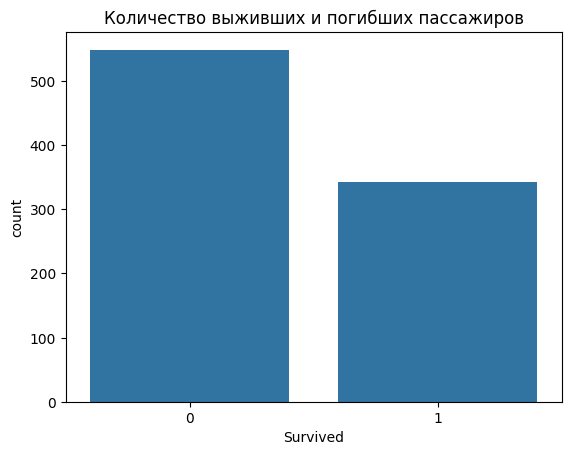

In [32]:
sns.countplot(x='Survived', data=df)
plt.title('Количество выживших и погибших пассажиров')
plt.show()

Графики распределения данных:

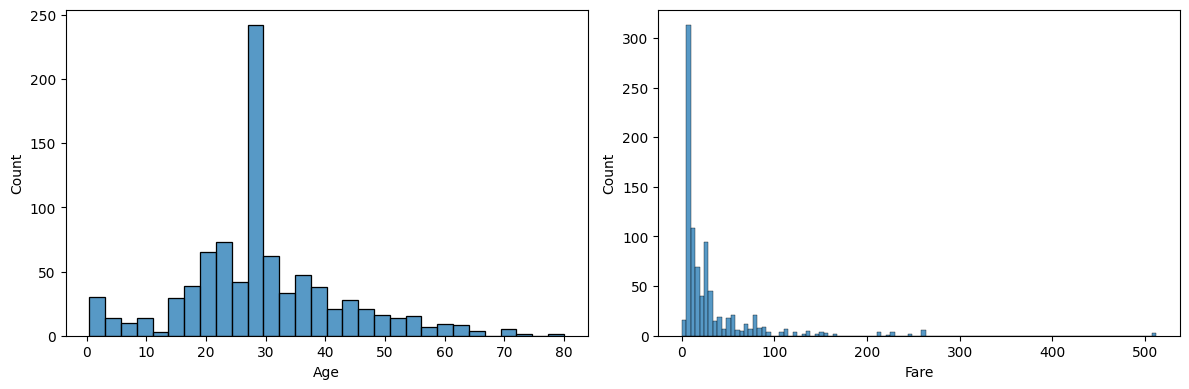

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.histplot(data=df['Age'], ax=axes[0])
sns.histplot(data=df['Fare'], ax=axes[1])
plt.tight_layout()
plt.show()

Проработаем дубликаты:

In [34]:
duplicates = df.duplicated()
if duplicates.any():
    print(f'Обнаружено {duplicates.sum()} дубликатов.')
    df.drop_duplicates(inplace=True)
else:
    print('Дубликатов нет.')

Дубликатов нет.


Закодируем категориальные признаки:

In [35]:
label_encoder = LabelEncoder()
categorical_features = ['Sex', 'Embarked']
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

Удаляем столбцы с уникальными значениями:

In [36]:
unique_columns = []
for col in df.columns:
    if len(df[col].unique()) == len(df):
        unique_columns.append(col)

if unique_columns:
    df.drop(columns=unique_columns, inplace=True)
    print(f'Уникальные столбцы удалены: {unique_columns}')
else:
    print('Нет уникальных столбцов для удаления.')

Уникальные столбцы удалены: ['PassengerId', 'Name']


Масштабирование числовых признаков:

In [37]:
standard_scaler = StandardScaler()
numeric_features = ['Age', 'Fare']
scaled_data = standard_scaler.fit_transform(df[numeric_features])
df[numeric_features] = scaled_data

Разделим на test и train выборки

In [45]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Задание №2

#### Обучение модели логистической регресии
* Обучите модель логистической регресии в Sklearn с параметрами по умолчанию.
* Вычислить метрики recall, precision, f1 на тренировочной и тестовой выборках.
* Сделать вывод о качестве обученной модели.

## Решение задания №2

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score

In [47]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,-0.565736,1,0,A/5 21171,-0.502445,NaN,2
1,1,1,0,0.663861,1,0,PC 17599,0.786845,C85,0
2,1,3,0,-0.258337,0,0,STON/O2. 3101282,-0.488854,NaN,2
3,1,1,0,0.433312,1,0,113803,0.420730,C123,2
4,0,3,1,0.433312,0,0,373450,-0.486337,NaN,2


## Задание №3

#### Настройка модели
* Обучите модель логистической регресии с подходящей для датасета и результата обучения типом регуляризации(l1, l2, elasticnet).
* Вычислить метрики полученной модели (f1, recall, precision).
* Сделать вывод о качестве обученной модели.
* Приведите график ROC-кривой.

## Задание №4

#### Настройка гиперпараметров модели.
*  Обучите модель логистической регресии с разным количеством итераций, параметром регуляризации и величной штрафа(параметр С).
* Вычислить метрики Recall, Precision, F1 на тренировочной и тестовой выборках.
* Сделать вывод о качестве обученной модели.